<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выделение-пользовательских-сессий" data-toc-modified-id="Выделение-пользовательских-сессий-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение пользовательских сессий</a></span></li><li><span><a href="#Подсчет-количества-событий-для-пользователя" data-toc-modified-id="Подсчет-количества-событий-для-пользователя-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подсчет количества событий для пользователя</a></span></li><li><span><a href="#События" data-toc-modified-id="События-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>События</a></span></li><li><span><a href="#Формирование-пользовательского-профиля" data-toc-modified-id="Формирование-пользовательского-профиля-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Формирование пользовательского профиля</a></span></li></ul></li><li><span><a href="#Сегментация-пользователей-на-основе-действий" data-toc-modified-id="Сегментация-пользователей-на-основе-действий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сегментация пользователей на основе действий</a></span><ul class="toc-item"><li><span><a href="#Сегментация-пользователей" data-toc-modified-id="Сегментация-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сегментация пользователей</a></span></li><li><span><a href="#Расчет-метрик" data-toc-modified-id="Расчет-метрик-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет метрик</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Пользователи-из-разных-источников" data-toc-modified-id="Пользователи-из-разных-источников-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Пользователи из разных источников</a></span></li><li><span><a href="#Пользователи-из-разных-групп" data-toc-modified-id="Пользователи-из-разных-групп-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Пользователи из разных групп</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

 # Мобильное приложение "Ненужные вещи"

**Шаги исследования**
- *Загрузка и обзор данных*
- *Предобработка данных*
    - Проверка и обработка пропусков
    - Изменение типов данных и переименование столцов
    - Проверка данных на аномалии и исправления
    - Проверка дубликатов
    - Объединение разных событий, связанных с поиском, в одно `search`
- *Исследовательский анализ данных*
    - Выделение сессий пользователя относительно тайм-аута.
    - Формирование пользовательского профиля. Подсчет количества событий для каждого пользователя и их распределение.
    - Источники привлечения и доля пользователей в них
    - Изучить пользователей для каждого события. Построить продуктовую воронку.
- *Сегментация пользователей на основе действий*
    - Сегментация пользователей по длительности сессии
    - Рассчет следующих метрик для выделенных групп: retention rate; время, проведённое в приложении; частота действий; конверсия в целевое действие — просмотр контактов.
- *Проверка статистических гипотез*
    - Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Гипотеза: две эти группы демонстрируют разную конверсию в просмотры контактов.
    - Пользователи разделены на `группы` по времени сессии. Гипотеза - конверсии в целевое событие для пользователей из различных групп отличаются.
- *Выводы и рекомендации*

## Загрузка и обзор данных

In [26]:
# импортируем библиотеки необходимые для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import math as mth
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [47]:
# выгрузка данных из файлов, вывод на экран информации о датафреймах и первых 5 строках
mobile_sourсes = pd.read_csv('mobile_sourсes.csv')
mobile_dataset = pd.read_csv('mobile_dataset.csv')

for df in [mobile_sourсes, mobile_dataset]:
    display(df.head())
    print(df.info())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


**Проблемы в данных**

- названия столбцов
- типы данных

## Предобработка данных

**Пропуски**

In [48]:
# подсчет пропусков в столбцах
for df in [mobile_sourсes, mobile_dataset]:
    print(df.isna().sum(),'\n')

userId    0
source    0
dtype: int64 

event.time    0
event.name    0
user.id       0
dtype: int64 



Как видно из проверки, а также из информации о датасетах на предыдущем этапе, пропуски отсутствуют.

**Изменение типов данных и переименование столцов**

In [49]:
# Приведем все символы в названиях столбцов таблиц к змеиному написанию
for df in [mobile_sourсes, mobile_dataset]:
    df.columns = df.columns.str.replace('.', '_')
    print(df.columns)

Index(['userId', 'source'], dtype='object')
Index(['event_time', 'event_name', 'user_id'], dtype='object')


In [50]:
# Переименуем столбцы в mobile_sourсes
mobile_sourсes = mobile_sourсes.rename(
    columns={'userId': 'user_id'}
)
mobile_sourсes.columns

Index(['user_id', 'source'], dtype='object')

In [51]:
# Изменим типы данных в столбце со временем
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']).astype('datetime64[s]')
print(mobile_dataset.dtypes)
mobile_dataset.head()

event_time    datetime64[ns]
event_name            object
user_id               object
dtype: object


,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [52]:
# Посмотрим за какой период времени у нас данные
mobile_dataset['event_time'].agg(['min','max'])

min   2019-10-07 00:00:00
max   2019-11-03 23:58:12
Name: event_time, dtype: datetime64[ns]

Данные по событиям представлены за период с 7 октября 2019 года по 3 ноября 2019 года

**Дубликаты**

In [53]:
# проверка на явные дубликаты
for df in [mobile_sourсes, mobile_dataset]:
    print(df.duplicated().sum())

0
1143


In [54]:
# посмотрим для каких событий есть дубликаты
mobile_dataset.loc[mobile_dataset.duplicated(), 'event_name'].value_counts()

photos_show      660
contacts_show    153
tips_show        148
map              132
advert_open       18
search_1          18
contacts_call      7
favorites_add      3
tips_click         3
search_3           1
Name: event_name, dtype: int64

In [55]:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

1143 дубликата в датасете mobile_dataset возникли при округлении времени события до секунд. В основном дубликаты возникли для события просмотра фотографий в объявлении. Вероятно пользователь быстро пролистывал фото(меньше одной секунды). Также появилось 153 дубликата в целевое событие.<br>
Но так как у нас 74197 строки, а также относительное значение количества дубликатов для разных событий не велико, то можем удалить дубликаты, это не повлияет на результаты исследования.

In [56]:
# удаление дубликатов, ignore_index=True означает, что индексы строк в полученном датасете будут идти по порядку
mobile_dataset.drop_duplicates(inplace=True, ignore_index=True)
mobile_dataset.duplicated().sum()

0

**Проверка данных на аномалии и исправления**

In [57]:
# подсчет количества событий
mobile_dataset['event_name'].value_counts()

tips_show        39907
photos_show       9352
advert_open       6146
contacts_show     4297
map               3749
search_1          3488
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      534
search_3           521
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Как видно из списка выше, у нас есть 2 события для целевого действия просмотр номера телефона `contacts_show` и `show_contacts`. Объединим их в одно событие, так как это одно и то же.

In [58]:
# замена события show_contacts на contacts_show
mobile_dataset['event_name'].replace('show_contacts', 'contacts_show', inplace=True)
mobile_dataset['event_name'].value_counts()

tips_show        39907
photos_show       9352
advert_open       6146
contacts_show     4376
map               3749
search_1          3488
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      534
search_3           521
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

Теперь объединим все 7 событий поиска `search_1, search_2,..., search_7` в одно событие `search`

In [59]:
# объединение событий поиска через replace() и регулярное выражение в атрибуте regex
mobile_dataset['event_name'].replace(regex='search_\d', value='search', inplace=True)
mobile_dataset['event_name'].value_counts()

tips_show        39907
photos_show       9352
search            6765
advert_open       6146
contacts_show     4376
map               3749
favorites_add     1414
tips_click         811
contacts_call      534
Name: event_name, dtype: int64

Объединение произведено успешно

In [60]:
# посмотрим распределение источников, из которых пользователь установил приложение
mobile_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

С Яднекса клиентов привлекается примерно столько же, как и со всех других сервисов вместе взятых

**Объединение датасетов**

In [61]:
mobile_dataset = mobile_dataset.merge(
        mobile_sourсes[['user_id', 'source']],
        on=['user_id'],
        how='left',
    )
display(mobile_dataset.head())
mobile_dataset.info()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73054 entries, 0 to 73053
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73054 non-null  datetime64[ns]
 1   event_name  73054 non-null  object        
 2   user_id     73054 non-null  object        
 3   source      73054 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


**Выводы**

- Пропусков в датасетах не обнаружено
- Названия столбцов приведены к единому типу написания
- Тип данных в столбце `event_time` изменен на дату и значения округлены до секунд. При округлении появились дубликаты из-за того, что на некоторые события пользователь тратил меньше секунды.
- Дубликаты в основном выявлены для события просмотр фото. Дубликаты удалены из датасета.
- Данные по событиям представлены за период `с 7 октября 2019 года по 3 ноября 2019 года`.
- События `contacts_show` и `show_contacts`, объединены в одно `contacts_show`. А также все 7 событий поиска `search_1, search_2,..., search_7` объеденины в `search`.
- Пользователи устанавливали приложение из 3 источников: `yandex, google, other`
- Датасеты объеденины в один `mobile_dataset`

## Исследовательский анализ данных

### Выделение пользовательских сессий

Чтобы понимать и в последствии исследовать(например по количеству событий в сессии), выделим пользовательские сессии на основе тайм-аута. Условия для выделения будут следующие: 
- события совершает уникальный пользователь
- время между событиями не больше 15 минут

Если делать временной промежуток слишком маленьким, то вероятны ошибочные разделения одной сессии. Пользователи могут просто не успеть просмотреть объявление, либо они могут открыть фотографию и на что-то отвлечься. Пятнадцатиминутный промежуток подобран опытным путем. 

In [62]:
# Cортировка датасета по времени, для корректной разбивки на сессии
# Вычисление разницы во времени для события каждого пользователя, относительного его прошлого события. 
# Сравниваем эту разницу со значением из Timedelta(). Если она больше, то получим значение True(или 1).
# Дальше складываем единицы с помощью cumsum(), тем самым выделяя новые сессии.
g = (mobile_dataset
     .sort_values(['user_id', 'event_time'])
     .groupby('user_id')['event_time'].diff() > pd.Timedelta('15Min')).cumsum()

# создаем новый столбец с идентифекаторами сессий, чтобы начать нумерацию сессий с единицы - ngroup() + 1
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', g], sort=False).ngroup() + 1

print('Количество сессий - {}'.format(mobile_dataset['session_id'].nunique()))
mobile_dataset.head()

Количество сессий - 11537


,event_time,event_name,user_id,source,session_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2


In [63]:
# посмотрим на пользователей с наибольшим количеством уникальных сессий
(
    mobile_dataset
     .pivot_table(index='user_id', values='session_id', aggfunc='nunique')
     .sort_values('session_id', ascending=False)
     .head(10)
)

,session_id
user_id,
21230dd9-2f7f-4b77-a436-43d4d10388e0,116
cb36854f-570a-41f4-baa8-36680b396370,79
1580911b-65db-4f1a-be7e-1ca39becac30,58
be1449f6-ca45-4f94-93a7-ea4b079b8f0f,55
6383ff6a-04b8-4562-a98f-bb4f760d3c39,46
e13f9f32-7ae3-4204-8d60-898db040bcfc,45
e38cb669-7335-4d56-9de5-c8d5d2f13fd3,40
d5e14ec3-7ae5-4598-ad36-f626b3ce24e3,38
70b57b3c-01b5-4635-b0c5-ed14b94e1359,37


Есть пользователи совершившие порядка 100 сессий в приложении.

In [64]:
# вычисление длительности сессии в минутах
session_time = mobile_dataset.groupby('session_id')['event_time'].agg(['min','max']).reset_index()
session_time['session_time_m'] = (session_time['max'] - session_time['min']).dt.total_seconds().div(60).round(2)

display(session_time.head())
print('средняя продолжительность сессии - {}мин'.format(session_time['session_time_m'].median()))

,session_id,min,max,session_time_m
0,1,2019-10-07 00:00:00,2019-10-07 00:18:42,18.70
1,2,2019-10-07 00:00:02,2019-10-07 00:41:40,41.63
2,3,2019-10-07 00:02:07,2019-10-07 00:30:22,28.25
3,4,2019-10-07 00:05:20,2019-10-07 00:05:23,0.05
4,5,2019-10-07 00:09:33,2019-10-07 00:50:22,40.82


средняя продолжительность сессии - 4.32мин


In [65]:
# количество сессий состоящих из 1 события
len(session_time.loc[session_time['session_time_m']==0])

2682

Так как в сессии всего одно событие, то время сессии не подсчитывается, т.е. равно 0 минут 0 секунд.

Это скажется на общем количестве сессий. Также это будет влиять на распределение пользователей по длительности одной сессии. Для данного исследования это по-сути не пригодится. Но эти сессии не удалены из датасета, просто чтобы помнить о них. А на этапе сегментации, при построении распределения по среднему времени сессии, будут отсечены пользователи с одной такой "нулевой" сессией путем фильтрации.

In [66]:
mobile_dataset.head()

,event_time,event_name,user_id,source,session_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2


In [67]:
# Группировка датасета по session_id
mobile_dataset_session = (
        mobile_dataset.sort_values(by=['user_id', 'event_time'])
        .groupby(['user_id', 'session_id'])
        .agg(
            {
                'event_time': 'first',
                'source': 'first'
            }
        )
        .rename(columns={'event_time': 'session_start'})
        .reset_index()
    )
mobile_dataset_session.head()

,user_id,session_id,session_start,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,2019-10-07 13:39:45,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,2019-10-09 18:33:55,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,2019-10-21 19:52:30,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,2019-10-22 11:18:14,other
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,2019-10-19 21:34:33,yandex


In [69]:
# Добавление столбца session_time_m в датасет путем слияния
mobile_dataset_session = mobile_dataset_session.merge(
        session_time[['session_id', 'session_time_m']],
        on=['session_id'],
        how='left',
    )
display(mobile_dataset_session.head())
mobile_dataset_session.info()

,user_id,session_id,session_start,source,session_time_m_x,session_time_m_y
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,2019-10-07 13:39:45,other,9.93,9.93
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,2019-10-09 18:33:55,other,8.45,8.45
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,2019-10-21 19:52:30,other,15.00,15.00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,2019-10-22 11:18:14,other,12.63,12.63
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,2019-10-19 21:34:33,yandex,25.35,25.35


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11536
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           11537 non-null  object        
 1   session_id        11537 non-null  int64         
 2   session_start     11537 non-null  datetime64[ns]
 3   source            11537 non-null  object        
 4   session_time_m_x  11537 non-null  float64       
 5   session_time_m_y  11537 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 630.9+ KB


### Подсчет количества событий для пользователя

In [70]:
# подсчет количества событий и количества сессий для каждого пользователя
# вывод источника привлечения
event_count = (mobile_dataset
                .groupby(['user_id'])
                .agg(
                    {
                        'event_name': 'count',
                        'session_id': 'nunique',
                        'source': 'first'
                    }
                )
                .rename(columns=
                    {
                        'event_name': 'event_count',
                        'session_id': 'sessions_count'
                    }
                )
                .reset_index()
)
event_count.sort_values('event_count', ascending=False).head()

,user_id,event_count,sessions_count,source
3397,cb36854f-570a-41f4-baa8-36680b396370,470,79,yandex
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,463,45,yandex
2629,9ce63488-758a-481a-bcb5-a02b467e1d84,406,17,yandex
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,398,116,yandex
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,396,55,google


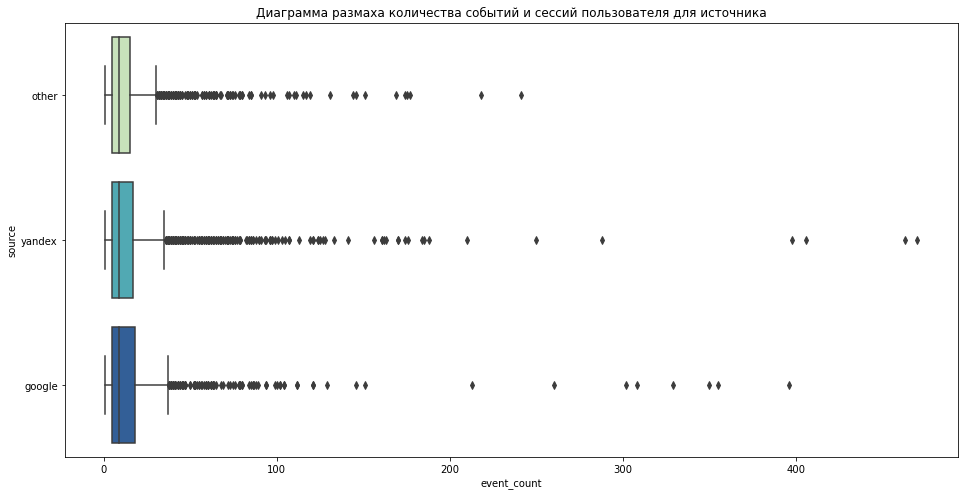

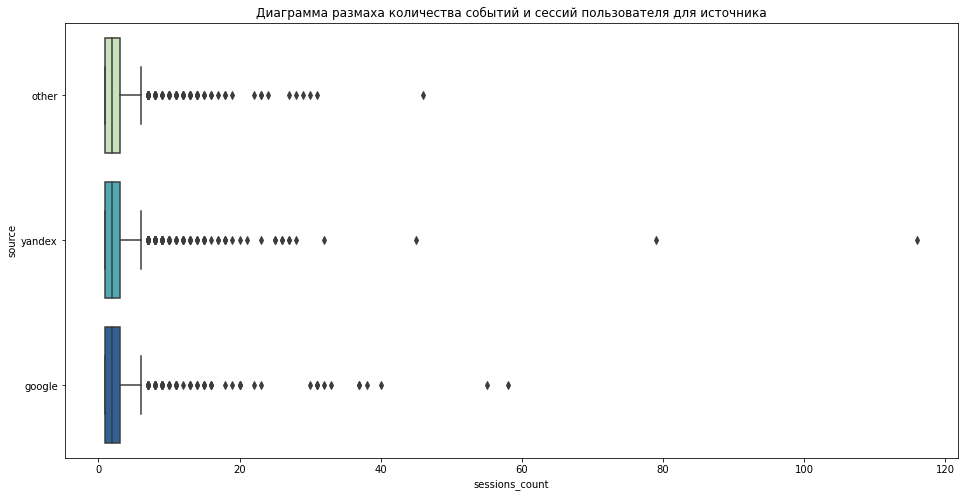

In [71]:
# количество событий для пользователей и количество уникальных сессий для каждого источника
for x in ['event_count', 'sessions_count']:
    plt.figure(figsize=(16,8))
    ax1 = sns.boxplot(
        data=event_count, x=x, y='source',
        palette='YlGnBu',
        orient='h'
    )
    plt.title('Диаграмма размаха количества событий и сессий пользователя для источника')
    plt.show()

In [72]:
# числовое описание данных количества сессий и событий для пользователя
event_count.groupby('source').describe()

event_count                                                    \
             count       mean        std  min  25%  50%   75%    max   
source                                                                 
google      1129.0  17.854739  31.491727  1.0  5.0  9.0  18.0  396.0   
other       1230.0  15.488618  21.920363  1.0  5.0  9.0  15.0  241.0   
yandex      1934.0  17.500000  30.487753  1.0  5.0  9.0  17.0  470.0   

       sessions_count                                                 
                count      mean       std  min  25%  50%  75%    max  
source                                                                
google         1129.0  2.816652  4.546553  1.0  1.0  2.0  3.0   58.0  
other          1230.0  2.695122  3.463241  1.0  1.0  2.0  3.0   46.0  
yandex         1934.0  2.607032  4.356426  1.0  1.0  2.0  3.0  116.0

Из диаграмм размаха и числовых описаний количества событий и сессий для каждого пользователя можно сделать выводы:
- на диаграммах присутствуют выбросы, значит среднее количество нужно определять по медиане
- среднее количество событий для пользователя и среднее количество сессий для разных исчтоников совпадают
- для пользователей из Яндекса и Google больше характерны выбросы

In [73]:
# вычислим среднее количество событий в сессии
event_session_count = (mobile_dataset
                .groupby(['user_id', 'session_id'])
                .agg(
                    {
                        'event_name': 'count'
                    }
                )
                .rename(columns=
                    {
                        'event_name': 'event_count'
                    }
                )
                .reset_index()
)
event_session_count.head()

,user_id,session_id,event_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,8
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,9


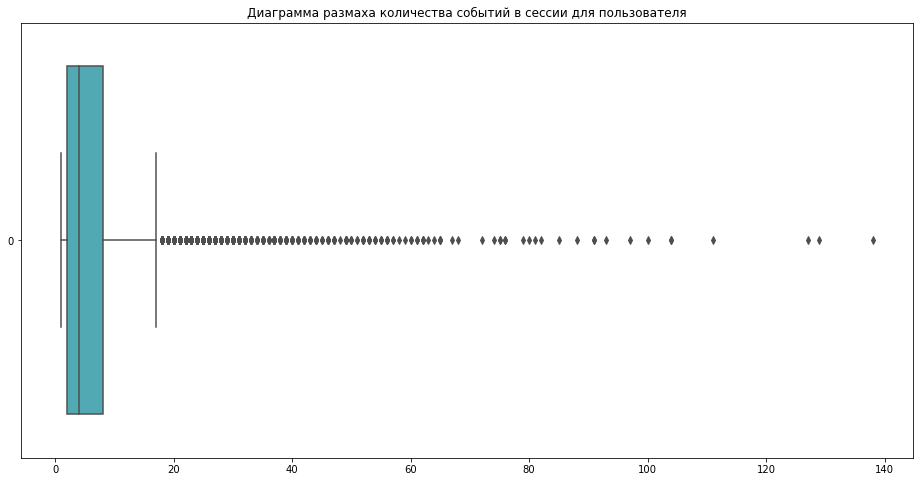

count    11537.000000
mean         6.332149
std          8.417438
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        138.000000
Name: event_count, dtype: float64

In [74]:
# количество событий для пользователей и количество уникальных сессий
plt.figure(figsize=(16,8))
ax1 = sns.boxplot(
    data=event_session_count['event_count'],
    palette='YlGnBu',
    orient='h'
)
plt.title('Диаграмма размаха количества событий в сессии для пользователя')
plt.show()

event_session_count['event_count'].describe()

По диаграмме размахе для количества событий в сессии также присутствуют выбросы, значит на среднее значение смотрим по медиане оно равно 4

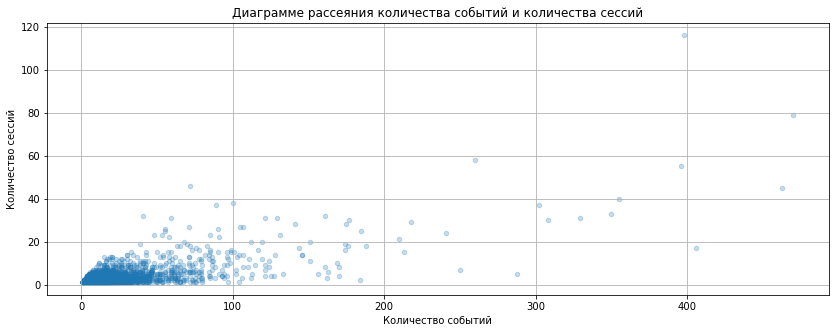

,event_count,sessions_count
event_count,1.000000,0.733203
sessions_count,0.733203,1.000000


In [75]:
# узнаем связаны ли количество сессий с количество событий
event_count.plot(x='event_count', y='sessions_count', kind='scatter', grid=True, figsize=(14,5), alpha=0.25)
plt.title('Диаграмме рассеяния количества событий и количества сессий')
plt.xlabel('Количество событий')
plt.ylabel('Количество сессий')
plt.show()

event_count.corr()

По диаграмме рассеяния и корреляции можно сделать вывод, что между количеством событий и сессий для пользователей есть сильная прямая связь.

### События

In [76]:
# количество событий
mobile_dataset['event_name'].value_counts()

tips_show        39907
photos_show       9352
search            6765
advert_open       6146
contacts_show     4376
map               3749
favorites_add     1414
tips_click         811
contacts_call      534
Name: event_name, dtype: int64

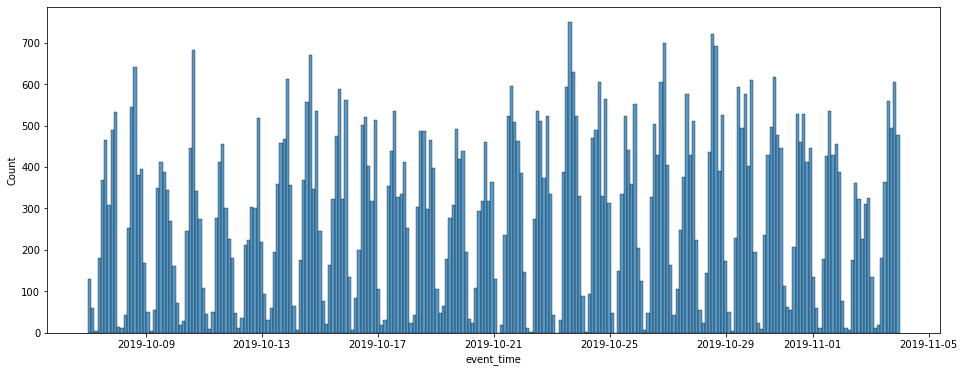

In [77]:
# гистограмма событий распределенных по времени
plt.figure(figsize=(16,6))
sns.histplot(x='event_time', data=mobile_dataset, bins=250)
plt.show()

По гистограмме видно, что события распределены равномерно по дням, а ночью идет спад активности пользователей.<br>
Посмотрим сколько событий и каких возникало для уникальных пользователей.

In [78]:
# количество уникальных пользователей для каждого события
# percent_of_all_users - процент от общего количества уникальных пользователей 
users_count = mobile_dataset.groupby('event_name').agg({'user_id':'nunique'}).sort_values('user_id', ascending=False)
users_count['percent_of_all_users'] = round(100 * users_count['user_id'] / mobile_dataset['user_id'].nunique(), 2)
users_count

,user_id,percent_of_all_users
event_name,,
tips_show,2801,65.25
search,1666,38.81
map,1456,33.92
photos_show,1095,25.51
contacts_show,981,22.85
advert_open,751,17.49
favorites_add,351,8.18
tips_click,322,7.50
contacts_call,213,4.96


Исходя из количества уникальных пользователей для события можно сказать:
- меньше 10% пользователей, увидевших рекомендованное объявление, перешли на него
- 25% пользователей просмотривает фотографии в объявлениях
- довольно много пользователей пользуются картой для отображения объявлений
- из пользователей просмотревших контакты продавца, через приложение звонят около 20%

Для того чтобы построить продуктовую воронку нужно определить в какой последовательности происходят события.
Из условий и документации нельзя точно определить последовательность событий, этот момент нужно уточнять у разработчиков и только тогда можно будет построить правильную воронку.

### Формирование пользовательского профиля

In [79]:
# функция для создания пользовательских профилей

def get_profiles(mobile_dataset_session):

    # находим параметры первых посещений
    profiles = (
        mobile_dataset_session.sort_values(by=['user_id', 'session_start'])
        .groupby(['user_id','session_id'])
        .agg(
            {
                'session_start': 'first',
                'source': 'first'
            }
        )
        .reset_index()
    )
    
    profiles = profiles.merge(
        session_time[['session_id', 'session_time_m']],
        on=['session_id'],
        how='left',
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый, в который это посещение произошло
    profiles['dt'] = profiles['session_start'].dt.date

    return profiles

In [80]:
# Формирование пользовательских профилей
# Вызываем функцию написанную выше и выводим информацию о датасете

profiles = get_profiles(mobile_dataset_session)
display(profiles.head())
profiles.info()

,user_id,session_id,session_start,source,session_time_m,dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,2019-10-07 13:39:45,other,9.93,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,2019-10-09 18:33:55,other,8.45,2019-10-09
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,2019-10-21 19:52:30,other,15.00,2019-10-21
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,2019-10-22 11:18:14,other,12.63,2019-10-22
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,2019-10-19 21:34:33,yandex,25.35,2019-10-19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11536
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         11537 non-null  object        
 1   session_id      11537 non-null  int64         
 2   session_start   11537 non-null  datetime64[ns]
 3   source          11537 non-null  object        
 4   session_time_m  11537 non-null  float64       
 5   dt              11537 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 630.9+ KB


В результате работы функции получили датасет со следующей информацией о пользователе:
- идентификатор пользователя
- идентификатор сессии
- время первого посещения приложения
- источник привлечения
- дата первого привлечения
- неделя первого привлечения

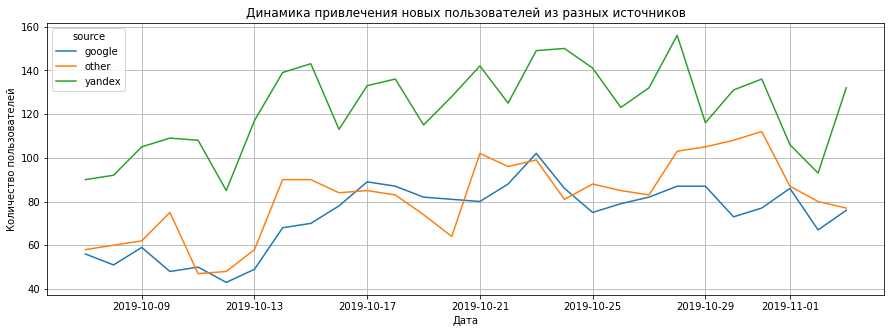

In [81]:
# динамика привлечения новых пользователей по каждому из источников привлечения
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.title('Динамика привлечения новых пользователей из разных источников')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')

plt.show()

- В период с 7 по 15 октября наблюдается увеличение числа пользователей, дальше показатели одинаковые
- Спады и увеличения числа пользователей по датам совпадают для всех источников.
- Чаще всего пользователи приходили из Яндекса, примерно одинаково из Googla и других источников.

## Сегментация пользователей на основе действий

### Сегментация пользователей

Разделим пользователей на группы для дальнейшего расчета метрик для каждой из них. Деление будем осуществлять исходя из длительности сессии пользователя.<br>
Чтобы определить группы, построим распределение количества сессий с определенным временем для уникального пользователя.

In [82]:
user_session_time = (
    profiles.sort_values(by=['user_id', 'session_start'])
        .groupby(['user_id'])
        .agg(
            {
                'session_time_m':'median'
            }
        )
        .reset_index()
)
user_session_time.head()

,user_id,session_time_m
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.28
1,00157779-810c-4498-9e05-a1e9e3cedf93,11.60
2,00463033-5717-4bf1-91b4-09183923b9df,24.70
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.65
4,00551e79-152e-4441-9cf7-565d7eb04090,0.05


In [83]:
# числовое описание времени сессий
user_session_time['session_time_m'].describe()

count    4293.000000
mean       10.295430
std        12.119047
min         0.000000
25%         2.290000
50%         6.570000
75%        13.730000
max       124.170000
Name: session_time_m, dtype: float64

Среднее время сессии для пользователя равно примерно 7 минутам

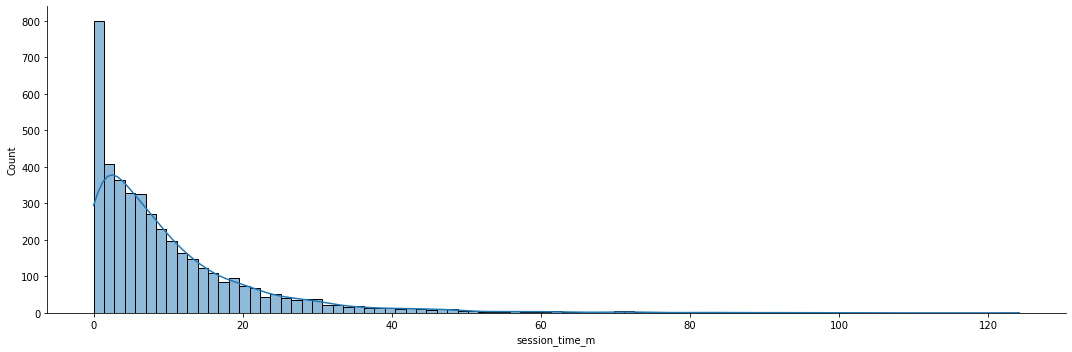

In [84]:
# распределение количества сессий по времени
sns.displot(user_session_time, x="session_time_m", kde=True, height=5, aspect=3)
plt.show()

Исключим значения 0 и > 50, чтобы остальное распределение было наглядно. Это поможет определить группы.

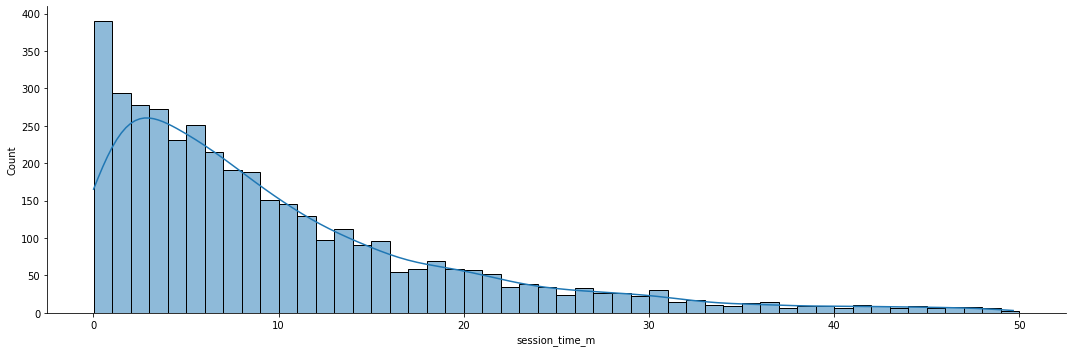

In [85]:
# распределение со значениями > 0 и < 50
sns.displot(user_session_time.loc[(user_session_time['session_time_m']>0) & 
                             (user_session_time['session_time_m']<50)], 
            x='session_time_m', kde=True,
            binwidth=1, aspect=3)
plt.show()

Определим группы следующим образом:
- группа 1 - длительность сессии от 0 до 4 минут 
- группа 2 - длительность сессии от 4 до 12 минут
- группа 3 - длительность сессии больше 12 минут

In [86]:
# напишем функцию, которая будет присваивать группу пользователю
def user_category(session_time):

    if (session_time >= 0) & (session_time <= 4):
        return '1'
    if (session_time > 4) & (session_time <= 12):
        return '2'
    return '3'    

In [87]:
# присвоение группы пользователю и запись ее в профиль
user_session_time['user_category'] = user_session_time['session_time_m'].apply(user_category)
display(user_session_time.head())
user_session_time.info()

,user_id,session_time_m,user_category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,11.28,2
1,00157779-810c-4498-9e05-a1e9e3cedf93,11.60,2
2,00463033-5717-4bf1-91b4-09183923b9df,24.70,3
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.65,2
4,00551e79-152e-4441-9cf7-565d7eb04090,0.05,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         4293 non-null   object 
 1   session_time_m  4293 non-null   float64
 2   user_category   4293 non-null   object 
dtypes: float64(1), object(2)
memory usage: 100.7+ KB


In [88]:
#  посмотрим на количество пользователей в группах
user_session_time['user_category'].value_counts(dropna=False)

1    1533
2    1501
3    1259
Name: user_category, dtype: int64

В результате деления на группы, получили 3 категории пользователей с примерно одинаковым количеством в каждой.

In [89]:
# добавление категорий в профили пользователей
profiles = profiles.merge(
    user_session_time[['user_id', 'user_category']],
    on=['user_id'],
    how='left'
)
profiles.head()

,user_id,session_id,session_start,source,session_time_m,dt,user_category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,2019-10-07 13:39:45,other,9.93,2019-10-07,2
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,2019-10-09 18:33:55,other,8.45,2019-10-09,2
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,2019-10-21 19:52:30,other,15.00,2019-10-21,2
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,2019-10-22 11:18:14,other,12.63,2019-10-22,2
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,2019-10-19 21:34:33,yandex,25.35,2019-10-19,2


### Расчет метрик

Для каждой из выделенных выше групп расчитаем следующие метрики:
- retention rate,
- время, проведённое в приложении,
- частота действий,
- конверсия в целевое действие — просмотр контактов.

**Retention rate**

In [90]:
# добавление групп пользователей в датасет с событиями
mobile_dataset = mobile_dataset.merge(
    user_session_time[['user_id', 'user_category']],
    on=['user_id'],
    how='left'
)
mobile_dataset.head()

,event_time,event_name,user_id,source,session_id,user_category
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,1,3
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,3
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2,3
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,1,3
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2,3


Создадим функцию, которая на вход будет принимать датасет с событиями пользователей mobile_dataset. Функция имеет возможность учитывать желаемый момент анализа, горизонт анализа. Также есть возможность разбиения датасета по интересующим признакам(в нашем случае по группам пользователей).

In [91]:
# создание функции
def get_retention(
    profiles, # датасет с событиями
    observation_date, # момент анализа
    horizon_days, # горизонт анализа
    dimensions=[], # признак, задающий параметры разбиения датасета
    ignore_horizon=False, # возможность игнорировать горизонт анализа, по умолчанию отключено
):
    # делаем столбец user_category предзаданным в dimensions
    dimensions = ['user_category'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('event_time <= @last_suitable_acquisition_date')
    
    # вычисление времени первого события для уникальных пользователей
    first_ts = (profiles.sort_values(by=['user_id', 'event_time'])
        .groupby(['user_id'])
        .agg(
            {
                'event_time': 'first',
            }
        )
        .rename(columns={'event_time':'first_ts'})
        .reset_index()
    )

    # присоединение полученного значения времени первой сессии для пользователя к mobile_dataset
    result_raw = profiles.merge(
        first_ts,
        on=['user_id'],
        how='left',
    )
    
    # перевод типа данных столбцов со временем в недели
    result_raw['event_time'] = result_raw['event_time'].astype('datetime64[W]')
    result_raw['first_ts'] = result_raw['first_ts'].astype('datetime64[W]')
    
    # вычисляем лайфтайм каждой сессии в неделях
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days / 7

    # строим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, 
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    
    # вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    
    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    
    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [92]:
# вызываем функцию с разбивкой по группам и датам
retention_raw, retention = get_retention(
    mobile_dataset, datetime(2019, 10, 3).date(), 5, dimensions=['first_ts']
)

In [93]:
# числовое описание удержания с размером когорт и нулевым лайфтаймом
retention

cohort_size  0.0       1.0       2.0       3.0  \
user_category first_ts                                                     
1             2019-10-03          201  1.0  0.368159  0.218905  0.159204   
              2019-10-10          434  1.0  0.343318  0.246544  0.126728   
              2019-10-17          394  1.0  0.357868  0.139594  0.000000   
              2019-10-24          354  1.0  0.248588  0.000000  0.000000   
              2019-10-31          150  1.0  0.000000  0.000000  0.000000   
2             2019-10-03          186  1.0  0.258065  0.166667  0.080645   
              2019-10-10          363  1.0  0.212121  0.132231  0.046832   
              2019-10-17          413  1.0  0.210654  0.075061  0.000000   
              2019-10-24          374  1.0  0.165775  0.000000  0.000000   
              2019-10-31          165  1.0  0.000000  0.000000  0.000000   
3             2019-10-03          160  1.0  0.162500  0.106250  0.081250   
              2019-10-10          323  1.0  0.111455  0.055728  0.021672   
              2019-10-17          329  1.0  0.136778  0.045593  0.000000   
              2019-10-24          286  1.0  0.090909  0.000000  0.000000   
              2019-10-31          161  1.0  0.000000  0.000000  0.000000   

                               4.0  
user_category first_ts              
1             2019-10-03  0.084577  
              2019-10-10  0.000000  
              2019-10-17  0.000000  
              2019-10-24  0.000000  
              2019-10-31  0.000000  
2             2019-10-03  0.096774  
              2019-10-10  0.000000  
              2019-10-17  0.000000  
              2019-10-24  0.000000  
              2019-10-31  0.000000  
3             2019-10-03  0.025000  
              2019-10-10  0.000000  
              2019-10-17  0.000000  
              2019-10-24  0.000000  
              2019-10-31  0.000000

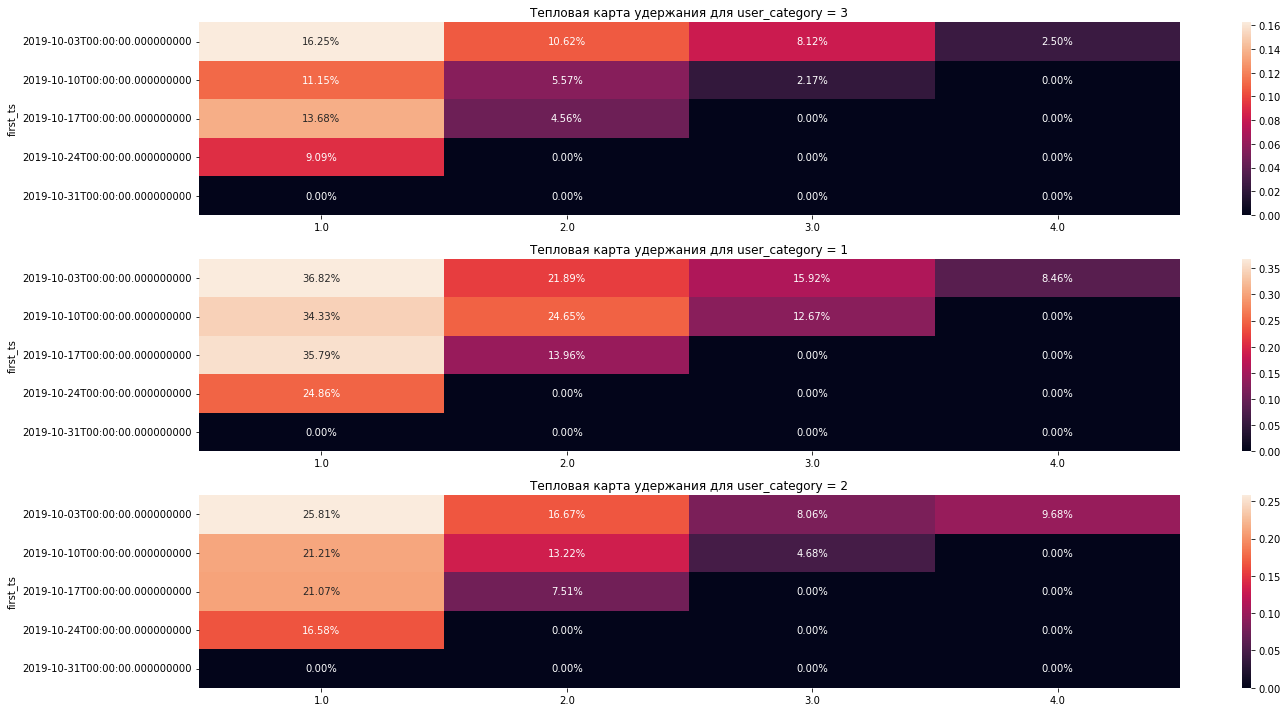

In [94]:
plt.figure(figsize=(20, 10)) # задаём размер сетки для графиков

# формируем пары элементов (3 пары в нашем случае) для каждой пары будем строить хитмэп
for i, user_category in enumerate(mobile_dataset['user_category'].unique()): 
    sns.heatmap(
        retention.query('user_category == @user_category')
        # удаляем user_category из индексов, чтобы не загромождать графики
        .droplevel('user_category')
        # исключаем размеры когорт и удержание первого дня
        .drop(columns=['cohort_size', 0]),
        # добавляем подписи значений
        annot=True,
        # переводим значения в проценты
        fmt='.2%',
        # строим каждый график в своей ячейке
        ax=plt.subplot(3, 1, i + 1),
    )
    # задаём названия графиков с учётом значения user_category
    plt.title('Тепловая карта удержания для user_category = {}'.format(user_category))

plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
plt.show()

Сравнение между категориями:
   - для всех категорий в первую неделю удержание хуже у привлеченных с 24 по 31 число
   - хуже всего удержание у 3-ей категории пользователей
   - лучше всего удержание у 1-ой категории

In [95]:
# вызываем функцию с разбивкой по группам и источникам
retention_raw, retention = get_retention(
    mobile_dataset, datetime(2019, 10, 3).date(), 5, dimensions=['source']
)

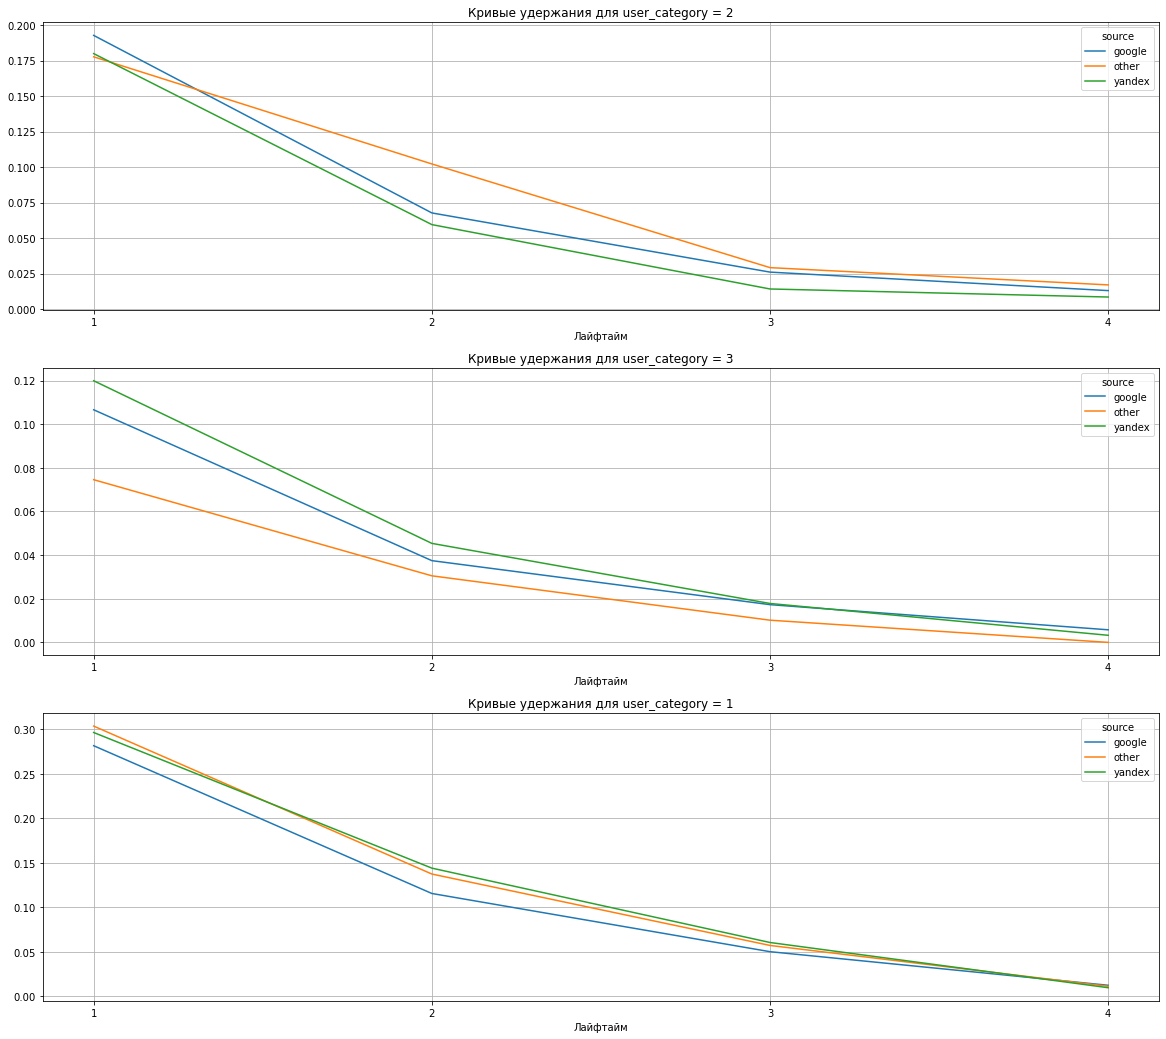

In [96]:
# строим кривые удержания

plt.figure(figsize=(20, 18))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = retention.drop(columns=['cohort_size', 0])

for i, user_category in enumerate(profiles['user_category'].unique()):
    report.query('user_category == @user_category').droplevel('user_category').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(3, 1, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для user_category = {}'.format(user_category))

plt.show()

Выводы по удержанию из источников:
- для 1-ой категории незначительно лучше удержание у пользователей с Яндекса, хуже с Google
- для 3-ей категории Яндекс чуть впереди Google, с других ресурсов заметно хуже удержание
- для 2-ой категории с других источников лучшее удержание, для ЯНдекса и Google примерно одинаковое

**Время, проведённое в приложении**

In [97]:
# создание двух столбцов со временем первого события в сессии и последнего
app_time = (mobile_dataset.sort_values(by=['user_id', 'event_time'])
        .groupby(['user_id', 'session_id'])
        .agg(
            {
                'event_time': ['first','last']
            }
        )
        .reset_index()
)

# переименование столбцов
app_time.columns=['user_id', 'session_id', 'event_time_first', 'event_time_last']

# вычисление длительности сессии
app_time['session_time'] = app_time['event_time_last'] - app_time['event_time_first']

app_time.head()

,user_id,session_id,event_time_first,event_time_last,session_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,92,2019-10-07 13:39:45,2019-10-07 13:49:41,0 days 00:09:56
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,827,2019-10-09 18:33:55,2019-10-09 18:42:22,0 days 00:08:27
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5477,2019-10-21 19:52:30,2019-10-21 20:07:30,0 days 00:15:00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5664,2019-10-22 11:18:14,2019-10-22 11:30:52,0 days 00:12:38
4,00157779-810c-4498-9e05-a1e9e3cedf93,4644,2019-10-19 21:34:33,2019-10-19 21:59:54,0 days 00:25:21


In [98]:
# вычисление общего времени нахождения в приложении для каждого пользователя
app_time = app_time.groupby('user_id').agg({'session_time':'sum'})
app_time.head()

,session_time
user_id,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:01
00157779-810c-4498-9e05-a1e9e3cedf93,0 days 02:07:52
00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:42
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 00:48:04
00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:19


In [99]:
# добавим к датасету соо временем в приложении, категорию пользователя
app_time = app_time.merge(
        mobile_dataset.groupby('user_id').agg({'user_category': 'first'}).reset_index(),
        on=['user_id'],
        how='left',
    )

In [100]:
# проверка присоединения столбца
print('размер датасета - {}'.format(app_time.shape))
app_time.head()

размер датасета - (4293, 3)


,user_id,session_time,user_category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:01,2
1,00157779-810c-4498-9e05-a1e9e3cedf93,0 days 02:07:52,2
2,00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:42,3
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 00:48:04,2
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:19,1


In [101]:
# вычисление суммарного времени нахождения в приложении для различных категорий пользователей
app_time.groupby('user_category').agg({'session_time': 'sum'}).reset_index()

,user_category,session_time
0,1,15 days 08:42:21
1,2,24 days 00:49:19
2,3,36 days 05:47:30


Видим по результатам:
- дольше всех в приложении находились пользователи из 3-ей группы, а меньше всех из 1-ой 
- разница между группами велика, примерно 11 дней

**Частота действий**

In [102]:
# общее количество всех событий
len(mobile_dataset['event_name'])

73054

In [103]:
# количество событий
mobile_dataset['event_name'].value_counts()

tips_show        39907
photos_show       9352
search            6765
advert_open       6146
contacts_show     4376
map               3749
favorites_add     1414
tips_click         811
contacts_call      534
Name: event_name, dtype: int64

In [104]:
# подсчет количества различных событий для группы пользователей
event_freq = (
    mobile_dataset.groupby(['user_category', 'event_name'])
        .agg(
            {'event_name': 'count',
            }
        )
        .rename(columns={'event_name':'event_count'})
        .reset_index()
)
event_freq.head()

,user_category,event_name,event_count
0,1,advert_open,1350
1,1,contacts_call,310
2,1,contacts_show,1565
3,1,favorites_add,477
4,1,map,894


In [105]:
# подсчет общего количества событий для группы пользователей
freq_event_sum = (
    event_freq.groupby('user_category')
    .agg(
            {'event_count': 'sum'
            }
        )
    .rename(columns={'event_count':'event_count_sum'})
)

freq_event_sum.head()

,event_count_sum
user_category,
1,19911
2,23981
3,29162


У 3-ей группы больше всего событий, у первой меньше всего

In [106]:
# слияние датасетов
event_freq = event_freq.merge(
    freq_event_sum,
    on=['user_category'],
    how='left',
)

In [107]:
# проверка слияния
print('размер датасета - {}'.format(event_freq.shape))
event_freq.head()

размер датасета - (27, 4)


,user_category,event_name,event_count,event_count_sum
0,1,advert_open,1350,19911
1,1,contacts_call,310,19911
2,1,contacts_show,1565,19911
3,1,favorites_add,477,19911
4,1,map,894,19911


In [108]:
# вычисление частоты каждого события для группы пользователей
event_freq['event_frequancy'] = round(100*event_freq['event_count'] / event_freq['event_count_sum'], 2)

In [109]:
# проверка вычислений частоты событий для каждой группы
event_freq.drop(['event_count', 'event_count_sum'], axis=1)
print('размер датасета - {}'.format(event_freq.shape))
event_freq.head()

размер датасета - (27, 5)


,user_category,event_name,event_count,event_count_sum,event_frequancy
0,1,advert_open,1350,19911,6.78
1,1,contacts_call,310,19911,1.56
2,1,contacts_show,1565,19911,7.86
3,1,favorites_add,477,19911,2.40
4,1,map,894,19911,4.49


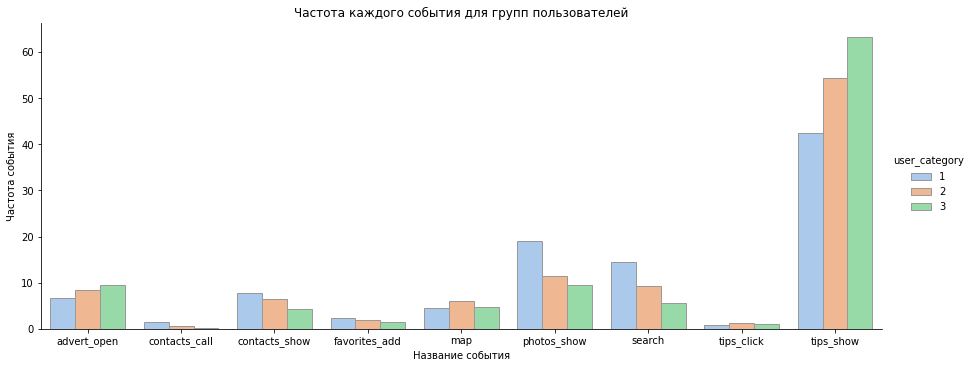

In [110]:
# график частоты событий
sns.catplot(data=event_freq, x="event_name", y='event_frequancy', 
            hue="user_category", 
            kind='bar', 
            palette="pastel", edgecolor=".6",
            height=5, aspect=2.5)
plt.title('Частота каждого события для групп пользователей')
plt.xlabel('Название события')
plt.ylabel('Частота события')
plt.show()

Из графика можно сделать следующие выводы:
- объявления пользователи из разных групп открывают тем чаще тем больше номер группы
- фотографии в объявлениях чаще просматривают пользователи из 1-о группы
- рекомендованные объявления чаще видят пользователи из более высокой по номеру группе. Это объясняется большим временем нахождения в приложении таких пользователей.
- кликают же по рекомендованному объявлению очень мало пользователей, это не зависит от группы
- смотрят номер телефона чаще пользователи из 1-ой, 2-ой и 3-ей группы соответственно. Это совпадает с распределением по звонкам из приложения.
- открывают карту объявлений чаще пользователи 2-ой группы
- поиском пользуются чаще пользователи из 1-ой, 2-ой и 3-ей группы соответственно. Такое же распределение частоты харакерно и для добавления в избранное объявления.

**Конверсия в целевое действие**

Количество пользователей совершивших целевое действие / Общее количество пользователей в группе

In [111]:
# количество уникальных пользователей в группах
all_users = (
    mobile_dataset
    .groupby('user_category')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id':'user_id_count'})
)
all_users

,user_id_count
user_category,
1,1533
2,1501
3,1259


In [112]:
# фильтрация датасета по пользователям, у которых событием является contacts_show
mobile_dataset_contact = mobile_dataset.loc[mobile_dataset['event_name']=='contacts_show']

print('список уникальных названий в столбце -', mobile_dataset_contact['event_name'].unique())
print('размер датасета - {}'.format(mobile_dataset_contact.shape))
mobile_dataset_contact.head()

список уникальных названий в столбце - ['contacts_show']
размер датасета - (4376, 6)


,event_time,event_name,user_id,source,session_id,user_category
24,2019-10-07 00:05:16,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,3,3
70,2019-10-07 00:18:53,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,3,3
195,2019-10-07 08:11:07,contacts_show,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex,11,2
244,2019-10-07 09:33:19,contacts_show,9dfa242e-8630-480a-806b-5736bcda8f3d,google,22,2
327,2019-10-07 10:19:49,contacts_show,1a3361d1-2002-4389-a669-ecb06ea7a90a,yandex,36,2


In [113]:
# подсчет количества уникальных пользователей совершивших целецвое действие для 3 групп 
mobile_dataset_contact_category = (
    mobile_dataset_contact
    .groupby('user_category')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id':'user_id_count'})
)
mobile_dataset_contact_category.head()

,user_id_count
user_category,
1,408
2,328
3,245


In [114]:
# расчет конверсии в целевое действие для различных групп
round(100*(mobile_dataset_contact_category / all_users), 2)

,user_id_count
user_category,
1,26.61
2,21.85
3,19.46


Для первой группы самая лучшая конверсия.

## Проверка статистических гипотез

### Пользователи из разных источников

Сформулируем нулевую гипотезу H0: конверсии пользователей в просмотры контактов из источников `yandex` и `google` не различаются. 

Гипотеза H1 будет звучать так: конверсии пользователей в просмотры контактов из источников `yandex` и `google` различаются.

Сначала подсчитаем количество пользователей из разных источников и целевые действия для них

In [115]:
# подсчет количества уникальных пользователей совершивших целецвое действие для разных источников
mobile_dataset = (
    mobile_dataset
    .groupby('source')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id':'user_id_count'})
)
mobile_dataset.head()

,user_id_count
source,
google,1129
other,1230
yandex,1934


In [116]:
# подсчет количества уникальных пользователей совершивших целецвое действие для разных источников
mobile_dataset_contact = (
    mobile_dataset_contact
    .groupby('source')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id':'user_id_count'})
)
mobile_dataset_contact.head()

,user_id_count
source,
google,275
other,228
yandex,478


В данной гипотезе нам нужно проверить равенство долей. Применим для этого разницу между пропорциями(z_value).

In [117]:
alpha = 0.05 # критический уровень статистической значимости

successes = np.array([mobile_dataset_contact.loc['yandex'], mobile_dataset_contact.loc['google']])
trials = np.array([mobile_dataset.loc['yandex'], mobile_dataset.loc['google']])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Такая разница в пропорциях не достаточна, чтобы говорить о статистически значимом различии.

### Пользователи из разных групп

Сформулируем нулевую гипотезу H0: конверсии в просмотры контактов не отличаются для пользователей из различных групп. То есть для тех, у кого отличается среднее время сессии.

Гипотеза H1 будет звучать так: конверсии в просмотры контактов для пользователей из различных групп различаются.

Так как у нас 3 группы, то будет 3 проверки гипотезы. Для начала отобразим количество пользователей для разных групп и количество пользователей с целевым событием.

In [118]:
# количество уникальных пользователей в группах
all_users

,user_id_count
user_category,
1,1533
2,1501
3,1259


In [119]:
# количество уникальных пользователей совершивших целецвое действие для 3 групп 
mobile_dataset_contact_category

,user_id_count
user_category,
1,408
2,328
3,245


Чтобы не дублировать код для каждой проверки создадим функцию

In [120]:
# функция для проверки равенста долей событий, будет ли отличие между группами статистически достоверным
def category_equals(successes_value1, successes_value2, trials_value1, trials_value2, alpha):
    alpha = alpha # критический уровень статистической значимости

    successes = np.array([successes_value1, successes_value2])
    trials = np.array([trials_value1, trials_value2])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [121]:
category_equals(mobile_dataset_contact_category.loc['1'], 
                mobile_dataset_contact_category.loc['3'],
                all_users.loc['1'],
                all_users.loc['3'],
                0.05)

p-значение:  [8.83414232e-06]
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [122]:
category_equals(mobile_dataset_contact_category.loc['1'], 
                mobile_dataset_contact_category.loc['2'],
                all_users.loc['1'],
                all_users.loc['2'],
                0.05)

p-значение:  [0.00221555]
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [123]:
category_equals(mobile_dataset_contact_category.loc['2'], 
                mobile_dataset_contact_category.loc['3'],
                all_users.loc['2'],
                all_users.loc['3'],
                0.05)

p-значение:  [0.12275373]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По итогам проверки можно сказать:
- между конверсиями для 2 и 3 группы нет значимой разницы
- между конверсиями для 1 и 3, а также для 1 и 2 группы, есть значимая разница

## Выводы

**Основные выводы**
- На этапе предобработки привели типы данных в столбцах к необходимым для  дальнейшего анализа, объеденили два исходных датасета с событиями и данными о источниках пользователей и похожие друг на друга события объеденили в одно.
- Исходя из времени событий и таймаута между ними были выделены пользовательские сессии
- Для уникальных пользователей посчитаны:
    - среднее количество событий - 9
    - среднее количество сессий - 2
    - среднее количество событий в одной сессии - 4
    - источник привлечения пользователя не влияет на эти цифры
- Построен график периодичности событий(активность пользователей в приложении). Периодичность имеет суточный характер. К ночи активность снижается, днем она самая высокая.
- Исходя из количества уникальных пользователей для события можно сказать:
    - меньше 10% пользователей, увидевших рекомендованное объявление, перешли на него
    - 25% пользователей просмотривает фотографии в объявлениях
    - довольно много пользователей пользуются картой для отображения объявлений
    - из пользователей просмотревших контакты продавца, через приложение звонят около 20%
- На основе выделенных пользовательских профилей:
    - В период с 7 по 15 октября наблюдается увеличение числа пользователей, дальше показатели одинаковые
    - Спады и увеличения числа пользователей по датам совпадают для всех источников.
    - Чаще всего пользователи приходили из Яндекса, примерно одинаково из Googla и других источников.
- Пользователи разбиты на 3 группы исходя из длительности их сессий
- Различие групп по метрикам:
    - хуже всего удержание у 3-ей группы пользователей, лучше всего у 1-ой
    - дольше всех в приложении находились пользователи из 3-ей группы - 36 дней, меньше всех из 1-ой - 15 дней, из 2-ой - 24 дня
    - У 3-ей группы больше всего событий - 30 тысяч, у 1-ой меньше всего - 20 тысяч, у 2-ой - 24 тысячи
    - у 1-ой группы конверсия значительно выше двух остальных групп, 27% против 22 и 20 соответственно
- Конверсии пользователей в просмотры контактов из источников yandex и google не различаются
- Конверсии в просмотры контактов для пользователей из 2 и 3 группы не отличаются. Для пользователей из 1 и 3, а также для 1 и 2 группы отличаются.

**Рекомендации**
- Чтобы увеличить конверсию в событие `просмотр контактов`, то нужно стремиться уменьшать среднюю длительность сессии пользователя. Исходя из количества пользователей в разных группах, потенциал для увеличения конверсии порядка 75%. Нужно отметить, что разница между конверсиями групп пользователей значимая.
- У пользователей пришедших с Яндекса: сильно лучше динамика привлечения; удержание для 1-ой и 3-ей группы не отличается от других источников, для 2-ой группы удержание для Яндекса хуже, чем для двух других источников. <br>Соответственно можно делать упор на платформу Яндекс. Это даст нам прирост пользователей в группу с самой высокой конверсией и удержанием.
- Событие "просмотр фотографий" характерно для пользователей целевой 1-ой группы. Значит наличие фотографий в объявлении положительно влияет на его привлекательность для интересующих нас пользователей.<br> 
    - Можно установить обязательные правила при подаче объявления на наличие фотографий или их количество и качество.
    - Также можно продвигать на первые места при поиске объявления с фотографиями.
    - При выдаче рекомендованных объявлений(событие `tips_show`), нужно отображать объявления с фотографиями.